In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
states_df = pd.read_csv('electric_vehicle_sales_by_state.csv')
makers_df = pd.read_csv('electric_vehicle_sales_by_makers.csv')
date_df = pd.read_csv('dim_date.csv')

In [ ]:
states_df.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [ ]:
makers_df.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [ ]:
date_df.head()

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [ ]:
states_date_df = pd.merge(states_df, date_df, on='date')
states_date_df.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,Sikkim,2-Wheelers,0,398,2022,Q1
1,01-Apr-21,Sikkim,4-Wheelers,0,361,2022,Q1
2,01-May-21,Sikkim,2-Wheelers,0,113,2022,Q1
3,01-May-21,Sikkim,4-Wheelers,0,98,2022,Q1
4,01-Jun-21,Sikkim,2-Wheelers,0,229,2022,Q1


In [ ]:
makers_date_df = pd.merge(makers_df, date_df, on='date')
makers_date_df.head()

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
1,01-Apr-22,2-Wheelers,OKAYA EV,0,2023,Q1
2,01-May-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0,2022,Q2


## **Rows and Columns Count**

In [ ]:
rows, columns = states_df.shape
print(f'The states_df has {rows} rows and {columns} columns.')

The states_df has 2445 rows and 5 columns.


In [ ]:
rows, columns = makers_df.shape
print(f'The makers_df has {rows} rows and {columns} columns.')

The makers_df has 816 rows and 4 columns.


In [ ]:
rows, columns = date_df.shape
print(f'The date_df has {rows} rows and {columns} columns.')

The date_df has 36 rows and 3 columns.


In [ ]:
rows, columns = states_date_df.shape
print(f'The states_date_df has {rows} rows and {columns} columns.')

The states_date_df has 2445 rows and 7 columns.


In [ ]:
rows, columns = makers_date_df.shape
print(f'The makers_date_df has {rows} rows and {columns} columns.')

The makers_date_df has 816 rows and 6 columns.


## **Dataset Information**

In [ ]:
states_date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   int64 
 4   total_vehicles_sold     2445 non-null   int64 
 5   fiscal_year             2445 non-null   int64 
 6   quarter                 2445 non-null   object
dtypes: int64(3), object(4)
memory usage: 133.8+ KB


In [ ]:
makers_date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
 4   fiscal_year             816 non-null    int64 
 5   quarter                 816 non-null    object
dtypes: int64(2), object(4)
memory usage: 38.4+ KB


### **Duplicate Values**

In [ ]:
states_date_df_duplicate = states_date_df.duplicated()
print(states_date_df_duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
2440    False
2441    False
2442    False
2443    False
2444    False
Length: 2445, dtype: bool


In [ ]:
makers_date_df_duplicate = makers_date_df.duplicated()
print(makers_date_df_duplicate)

0      False
1      False
2      False
3      False
4      False
       ...  
811    False
812    False
813    False
814    False
815    False
Length: 816, dtype: bool


### **Missing Values / Null Values**

In [ ]:
states_date_df_null_values = states_date_df.isnull()
print(states_date_df_null_values)

       date  state  vehicle_category  electric_vehicles_sold  \
0     False  False             False                   False   
1     False  False             False                   False   
2     False  False             False                   False   
3     False  False             False                   False   
4     False  False             False                   False   
...     ...    ...               ...                     ...   
2440  False  False             False                   False   
2441  False  False             False                   False   
2442  False  False             False                   False   
2443  False  False             False                   False   
2444  False  False             False                   False   

      total_vehicles_sold  fiscal_year  quarter  
0                   False        False    False  
1                   False        False    False  
2                   False        False    False  
3                   False      

In [ ]:
makers_date_df_null_values = makers_date_df.isnull()
print(makers_date_df_null_values)

      date  vehicle_category  maker  electric_vehicles_sold  fiscal_year  \
0    False             False  False                   False        False   
1    False             False  False                   False        False   
2    False             False  False                   False        False   
3    False             False  False                   False        False   
4    False             False  False                   False        False   
..     ...               ...    ...                     ...          ...   
811  False             False  False                   False        False   
812  False             False  False                   False        False   
813  False             False  False                   False        False   
814  False             False  False                   False        False   
815  False             False  False                   False        False   

     quarter  
0      False  
1      False  
2      False  
3      False  
4      False

### **Understanding Your Variables**

In [ ]:
states_date_df_columns = states_date_df.columns
print(states_date_df_columns)

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold', 'fiscal_year', 'quarter'],
      dtype='object')


In [ ]:
makers_date_df_columns = makers_date_df.columns
print(makers_date_df_columns)

Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold',
       'fiscal_year', 'quarter'],
      dtype='object')


In [ ]:
states_date_df_dtypes = states_date_df.dtypes
print(states_date_df_dtypes)

date                      object
state                     object
vehicle_category          object
electric_vehicles_sold     int64
total_vehicles_sold        int64
fiscal_year                int64
quarter                   object
dtype: object


In [ ]:
makers_date_df_dtypes = makers_date_df.dtypes
print(makers_date_df_dtypes)

date                      object
vehicle_category          object
maker                     object
electric_vehicles_sold     int64
fiscal_year                int64
quarter                   object
dtype: object


In [ ]:
states_date_df_info = states_date_df.info()
print(states_date_df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   int64 
 4   total_vehicles_sold     2445 non-null   int64 
 5   fiscal_year             2445 non-null   int64 
 6   quarter                 2445 non-null   object
dtypes: int64(3), object(4)
memory usage: 133.8+ KB
None


In [ ]:
makers_date_df_info = makers_date_df.info()
print(makers_date_df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
 4   fiscal_year             816 non-null    int64 
 5   quarter                 816 non-null    object
dtypes: int64(2), object(4)
memory usage: 38.4+ KB
None


In [ ]:
states_date_df_describe = states_date_df.describe()
print(states_date_df_describe)

       electric_vehicles_sold  total_vehicles_sold  fiscal_year
count             2445.000000          2445.000000  2445.000000
mean               845.035174         23402.966053  2022.999591
std               2185.167744         38353.266389     0.816413
min                  0.000000             1.000000  2022.000000
25%                  2.000000          1158.000000  2022.000000
50%                 54.000000          6098.000000  2023.000000
75%                534.000000         29396.000000  2024.000000
max              26668.000000        387983.000000  2024.000000


In [ ]:
makers_date_df_describe = makers_date_df.describe()
print(makers_date_df_describe)

       electric_vehicles_sold  fiscal_year
count              816.000000   816.000000
mean              2531.998775  2023.014706
std               4771.077333     0.813855
min                  0.000000  2022.000000
25%                 42.000000  2022.000000
50%                662.000000  2023.000000
75%               2636.500000  2024.000000
max              44630.000000  2024.000000


### **Check Unique Values for Each Variable**

In [ ]:
for states_date_df_column in states_date_df.columns:
    unique_vals = states_date_df[states_date_df_column].nunique()
    print(f"Unique values in column '{states_date_df_column}': {unique_vals}")

Unique values in column 'date': 36
Unique values in column 'state': 35
Unique values in column 'vehicle_category': 2
Unique values in column 'electric_vehicles_sold': 921
Unique values in column 'total_vehicles_sold': 2225
Unique values in column 'fiscal_year': 3
Unique values in column 'quarter': 4


In [ ]:
for makers_date_df_column in makers_date_df.columns:
    unique_vals = makers_date_df[makers_date_df_column].nunique()
    print(f"Unique values in column '{makers_date_df_column}': {unique_vals}")

Unique values in column 'date': 36
Unique values in column 'vehicle_category': 2
Unique values in column 'maker': 26
Unique values in column 'electric_vehicles_sold': 603
Unique values in column 'fiscal_year': 3
Unique values in column 'quarter': 4


In [ ]:
states_date_df

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,Sikkim,2-Wheelers,0,398,2022,Q1
1,01-Apr-21,Sikkim,4-Wheelers,0,361,2022,Q1
2,01-May-21,Sikkim,2-Wheelers,0,113,2022,Q1
3,01-May-21,Sikkim,4-Wheelers,0,98,2022,Q1
4,01-Jun-21,Sikkim,2-Wheelers,0,229,2022,Q1
...,...,...,...,...,...,...,...
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932,2024,Q4
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780,2024,Q4
2442,01-Mar-24,Manipur,2-Wheelers,13,1394,2024,Q4
2443,01-Mar-24,Andaman & Nicobar Island,2-Wheelers,2,447,2024,Q4


In [ ]:
makers_date_df

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
1,01-Apr-22,2-Wheelers,OKAYA EV,0,2023,Q1
2,01-May-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0,2022,Q2
...,...,...,...,...,...,...
811,01-Mar-24,2-Wheelers,BGAUSS,3070,2024,Q4
812,01-Mar-24,2-Wheelers,BATTRE ELECTRIC,625,2024,Q4
813,01-Mar-24,2-Wheelers,KINETIC GREEN,3915,2024,Q4
814,01-Mar-24,2-Wheelers,REVOLT,585,2024,Q4


## **UNIVARIATE ANALYSIS**

--- Univariate Analysis: Numerical Variables ---


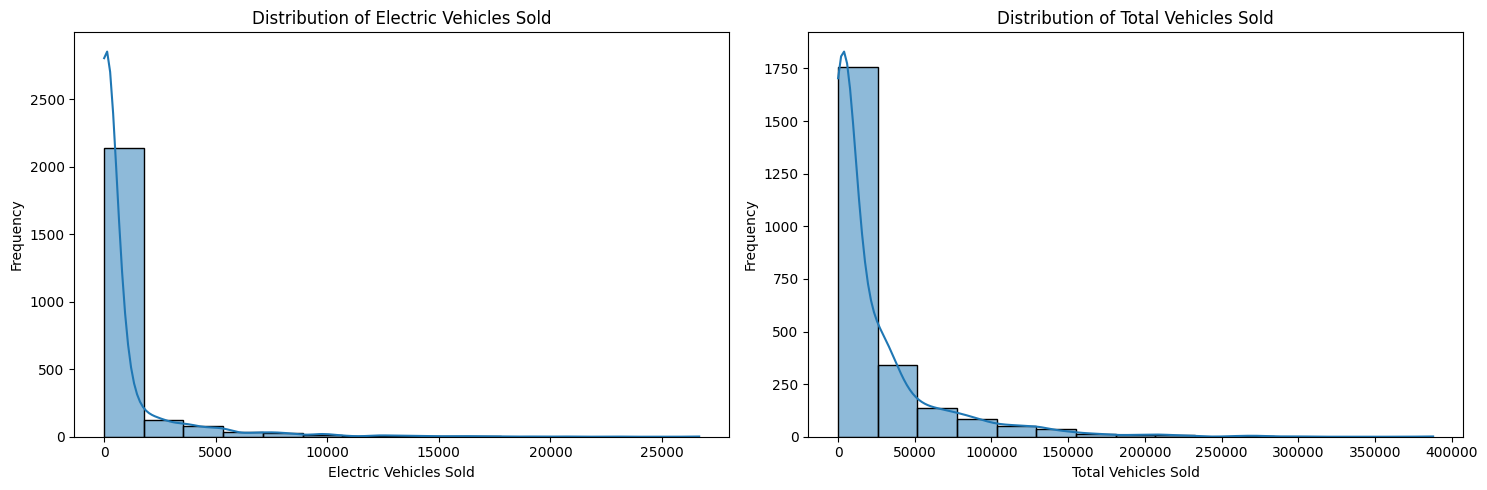

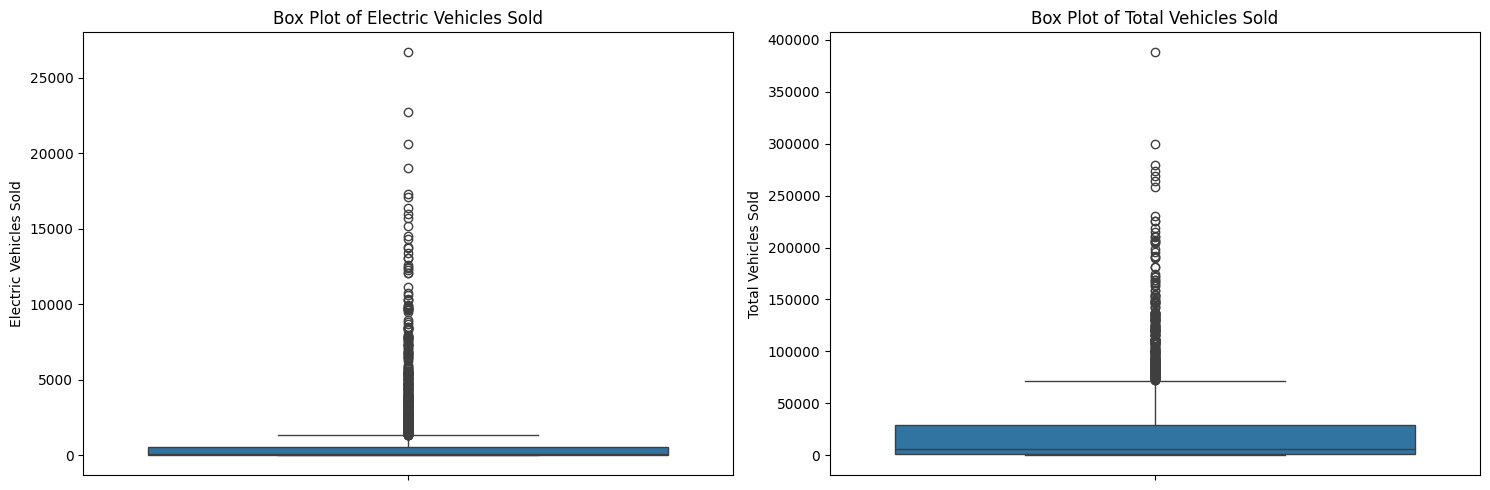

In [ ]:
print("--- Univariate Analysis: Numerical Variables ---")

numerical_cols = ['electric_vehicles_sold', 'total_vehicles_sold'] # Example subset

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.histplot(states_date_df[col], kde=True, bins=15)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=states_date_df[col])
    plt.title(f'Box Plot of {col.replace("_", " ").title()}')
    plt.ylabel(col.replace("_", " ").title())
plt.tight_layout()
plt.show()

--- Univariate Analysis: Numerical Variables ---


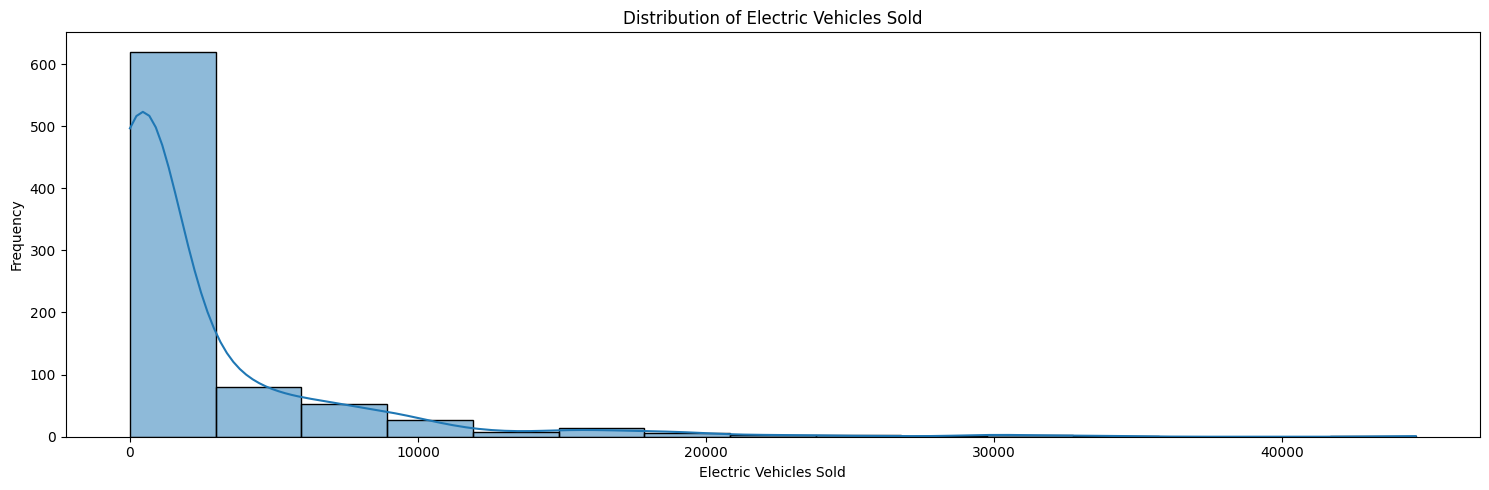

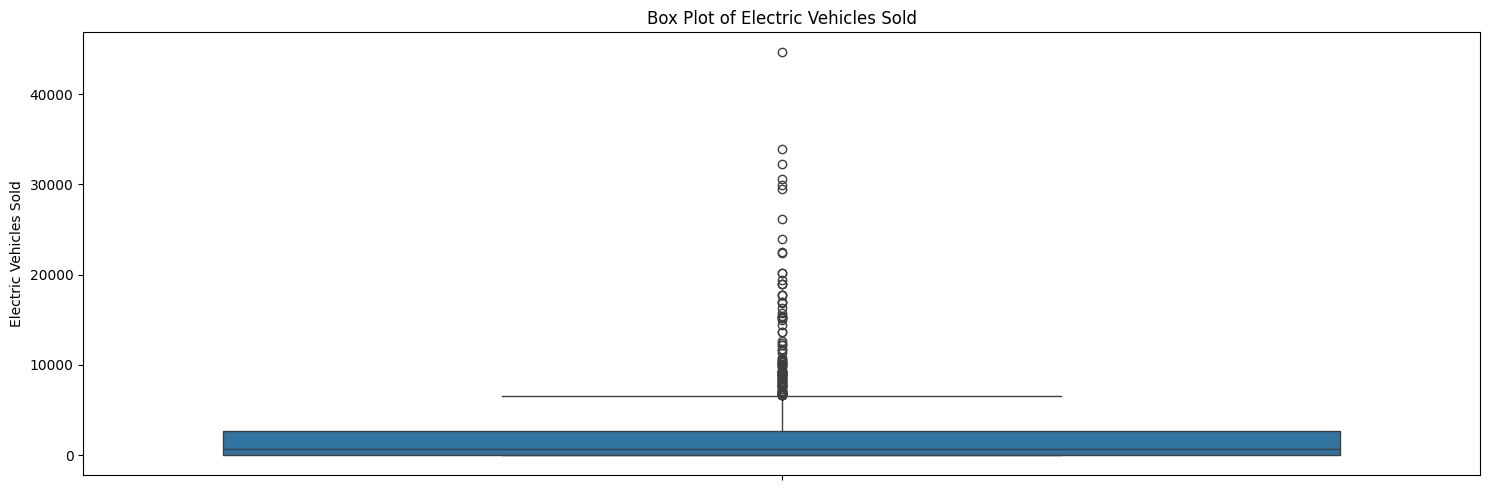

In [ ]:
print("--- Univariate Analysis: Numerical Variables ---")

numerical_cols = ['electric_vehicles_sold'] # Example subset

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.histplot(makers_date_df[col], kde=True, bins=15)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=makers_date_df[col])
    plt.title(f'Box Plot of {col.replace("_", " ").title()}')
    plt.ylabel(col.replace("_", " ").title())
plt.tight_layout()
plt.show()

--- Univariate Analysis: Categorical Variables ---


/tmp/ipython-input-33-755106442.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=states_date_df, x=col, order=states_date_df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-33-755106442.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=states_date_df, x=col, order=states_date_df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-33-755106442.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=states_date_df, x=col, order=states_date_df[col].value_counts().index, palette='viridis')
/tmp

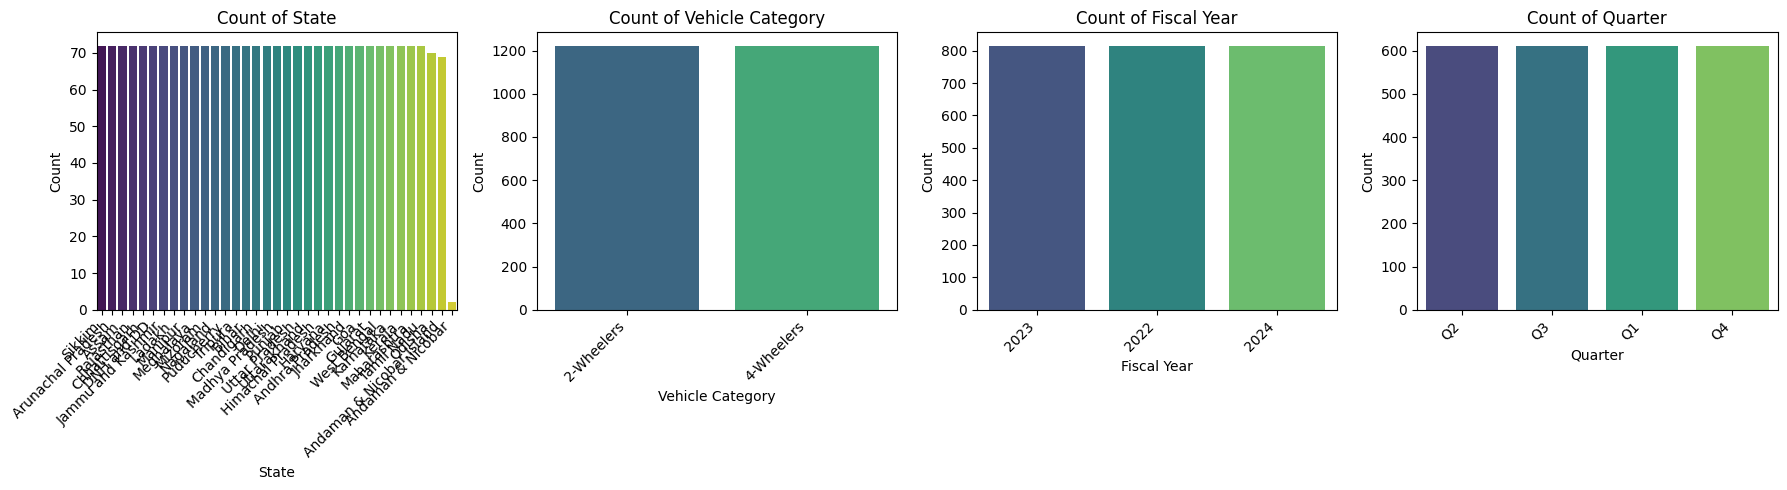

In [ ]:
print("--- Univariate Analysis: Categorical Variables ---")

categorical_cols = ['state', 'vehicle_category', 'fiscal_year', 'quarter'] # Example subset

plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i + 1)
    sns.countplot(data=states_date_df, x=col, order=states_date_df[col].value_counts().index, palette='viridis')
    plt.title(f'Count of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


--- Univariate Analysis: Categorical Variables ---


/tmp/ipython-input-35-762125782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=makers_date_df, x=col, order=makers_date_df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-35-762125782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=makers_date_df, x=col, order=makers_date_df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-35-762125782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=makers_date_df, x=col, order=makers_date_df[col].value_counts().index, palette='viridis')
/tmp

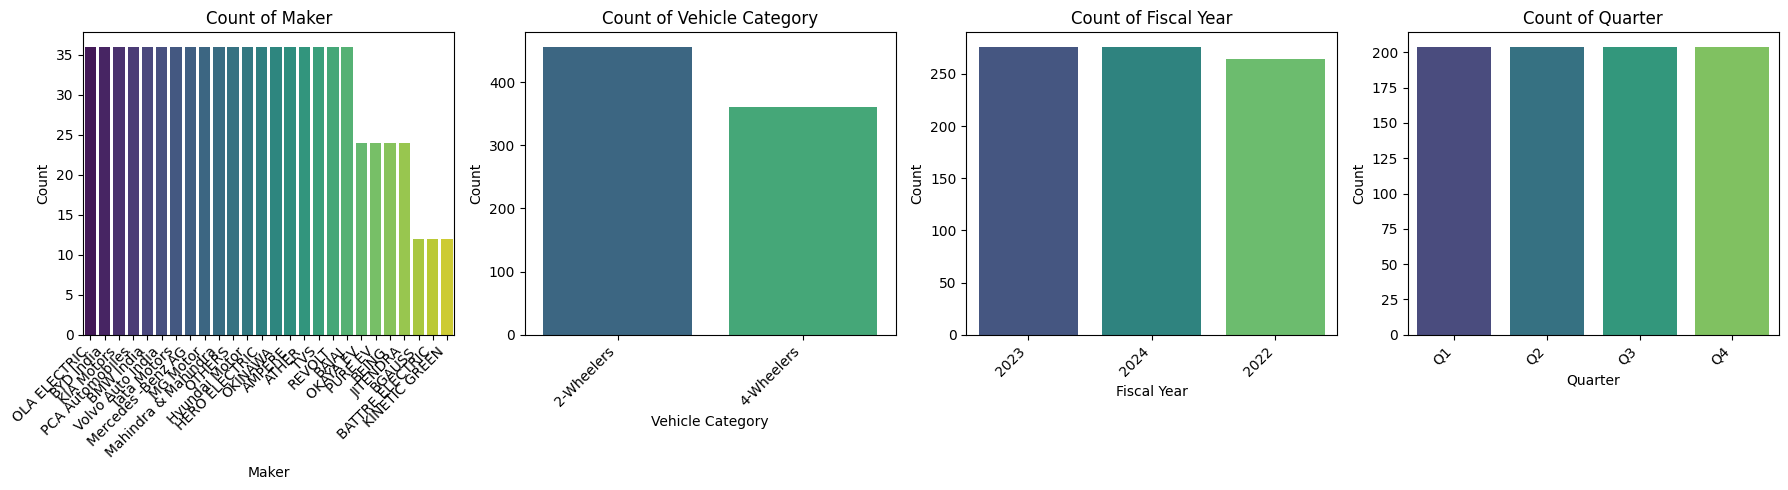

In [ ]:
print("--- Univariate Analysis: Categorical Variables ---")

categorical_cols = ['maker', 'vehicle_category', 'fiscal_year', 'quarter'] # Example subset

plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i + 1)
    sns.countplot(data=makers_date_df, x=col, order=makers_date_df[col].value_counts().index, palette='viridis')
    plt.title(f'Count of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **BIVARIATE ANALYSIS**

/tmp/ipython-input-40-1718208788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=states_date_df, x='state', y='electric_vehicles_sold', palette='coolwarm')


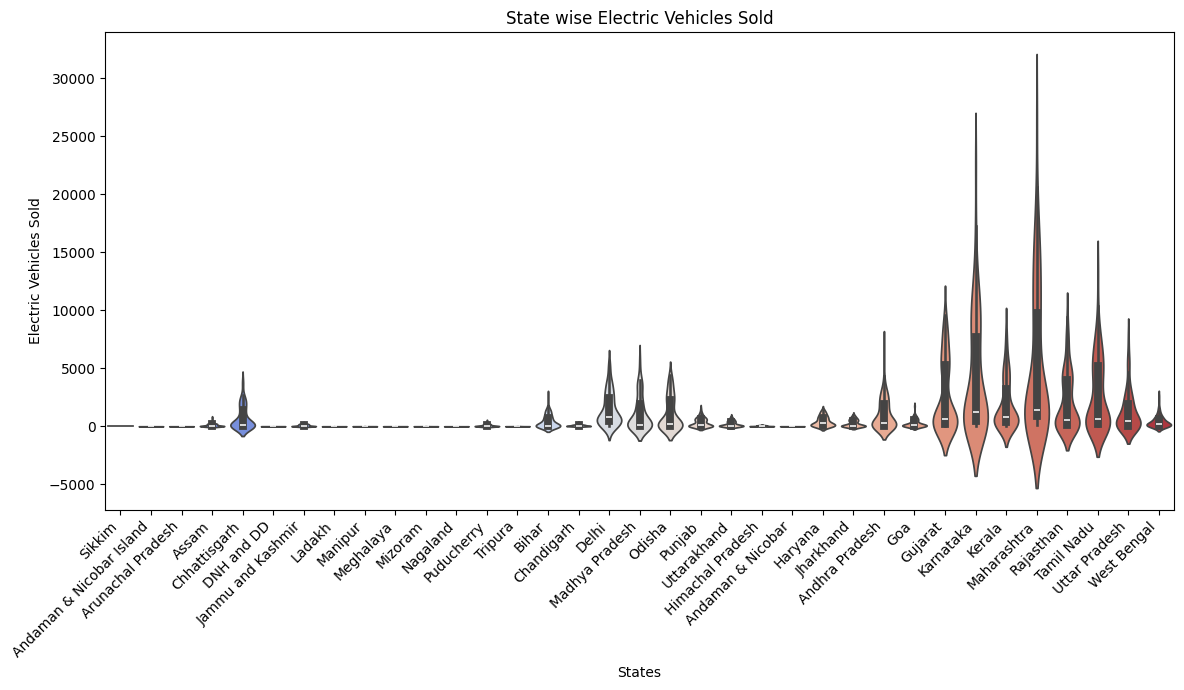

In [ ]:
plt.figure(figsize=(12, 7))
sns.violinplot(data=states_date_df, x='state', y='electric_vehicles_sold', palette='coolwarm')
plt.title('State wise Electric Vehicles Sold')
plt.xlabel('States')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-43-3873594491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=states_date_df, x='state', y='total_vehicles_sold', palette='pastel')


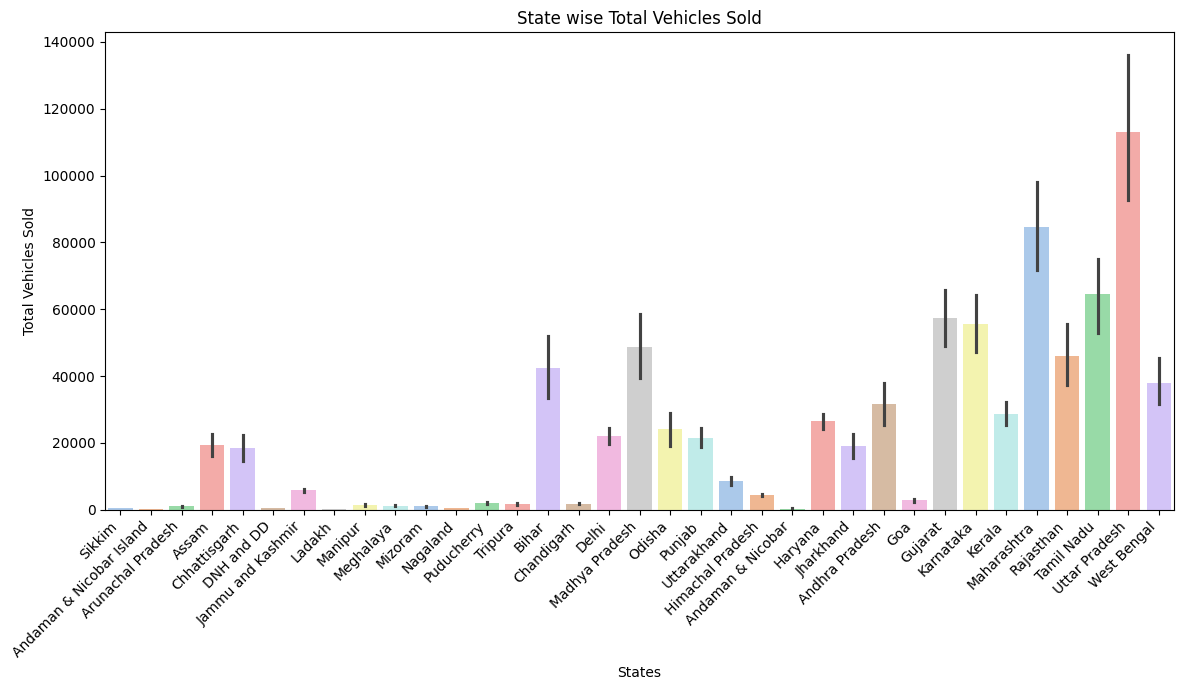

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=states_date_df, x='state', y='total_vehicles_sold', palette='pastel')
plt.title('State wise Total Vehicles Sold')
plt.xlabel('States')
plt.ylabel('Total Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-44-1943068602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=states_date_df, x='quarter', y='electric_vehicles_sold', palette='pastel')


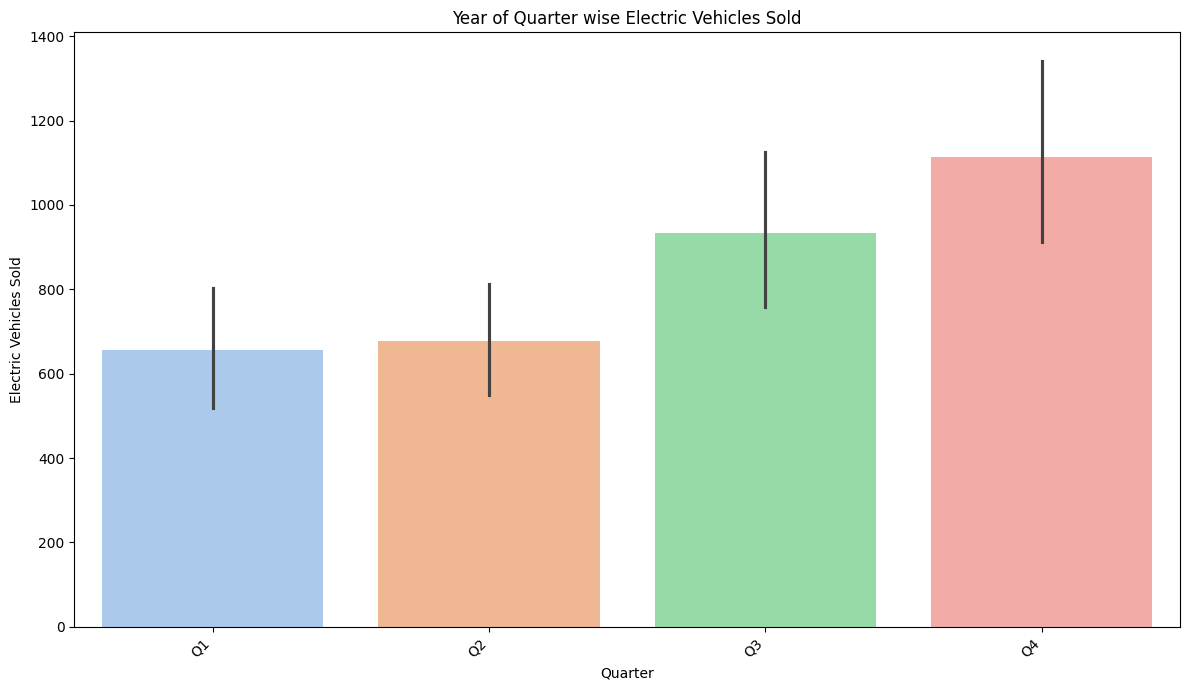

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=states_date_df, x='quarter', y='electric_vehicles_sold', palette='pastel')
plt.title('Year of Quarter wise Electric Vehicles Sold')
plt.xlabel('Quarter')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-46-51868978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=states_date_df, x='quarter', y='total_vehicles_sold', palette='pastel')


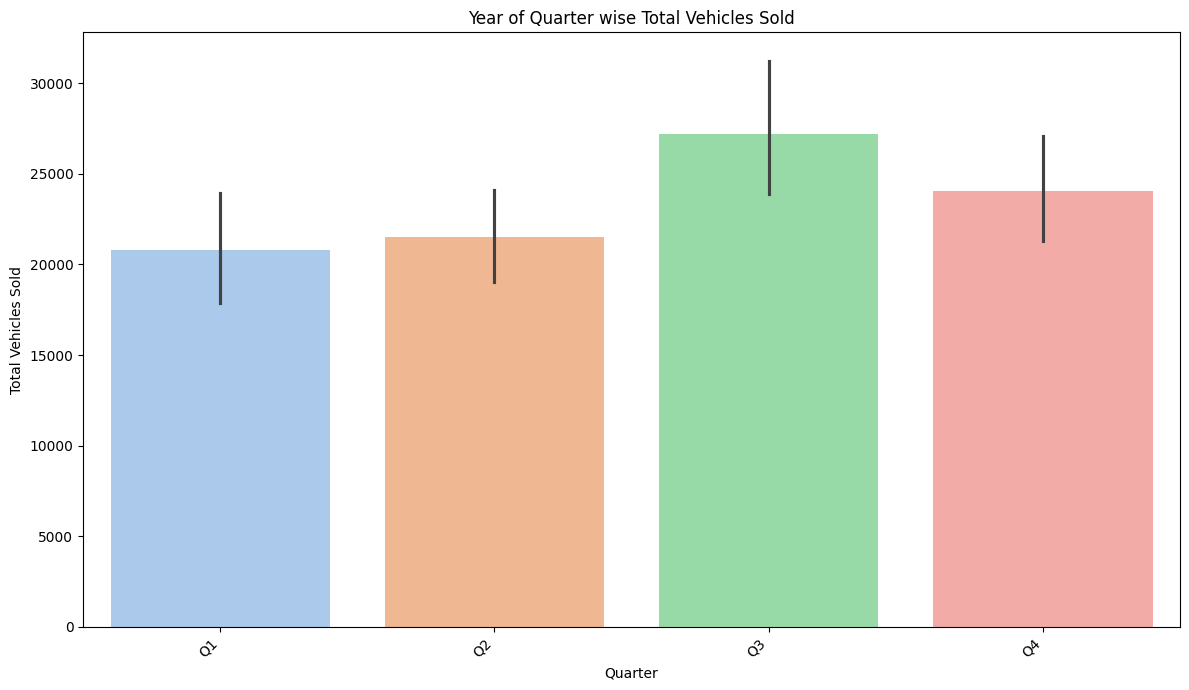

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=states_date_df, x='quarter', y='total_vehicles_sold', palette='pastel')
plt.title('Year of Quarter wise Total Vehicles Sold')
plt.xlabel('Quarter')
plt.ylabel('Total Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-47-1945419316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=states_date_df, x='fiscal_year', y='electric_vehicles_sold', palette='pastel')


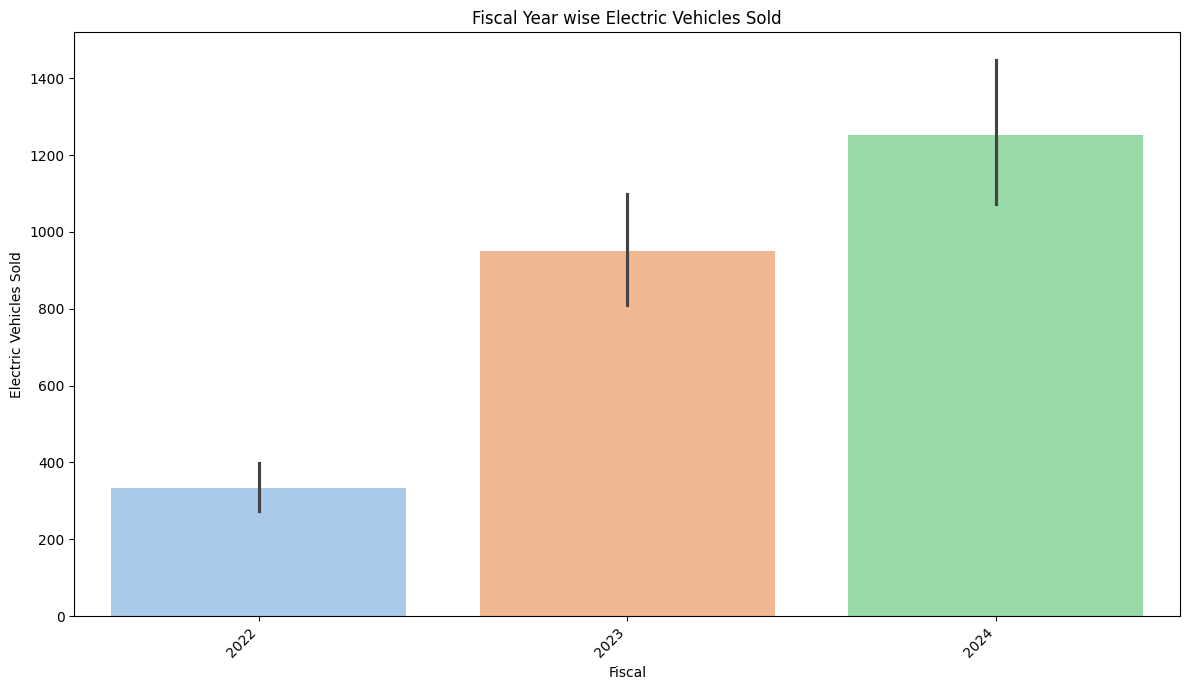

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=states_date_df, x='fiscal_year', y='electric_vehicles_sold', palette='pastel')
plt.title('Fiscal Year wise Electric Vehicles Sold')
plt.xlabel('Fiscal')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-50-3308850486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=states_date_df, x='fiscal_year', y='total_vehicles_sold', palette='pastel')


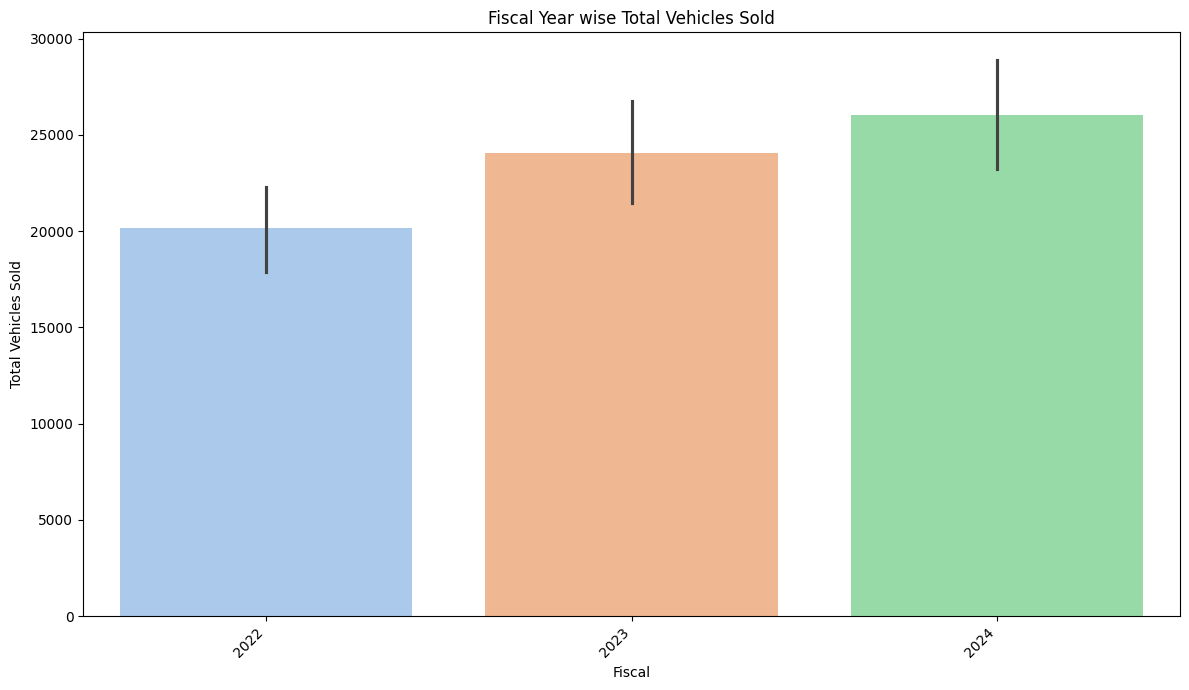

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=states_date_df, x='fiscal_year', y='total_vehicles_sold', palette='pastel')
plt.title('Fiscal Year wise Total Vehicles Sold')
plt.xlabel('Fiscal')
plt.ylabel('Total Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-48-873766153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=states_date_df, x='vehicle_category', y='electric_vehicles_sold', palette='pastel')


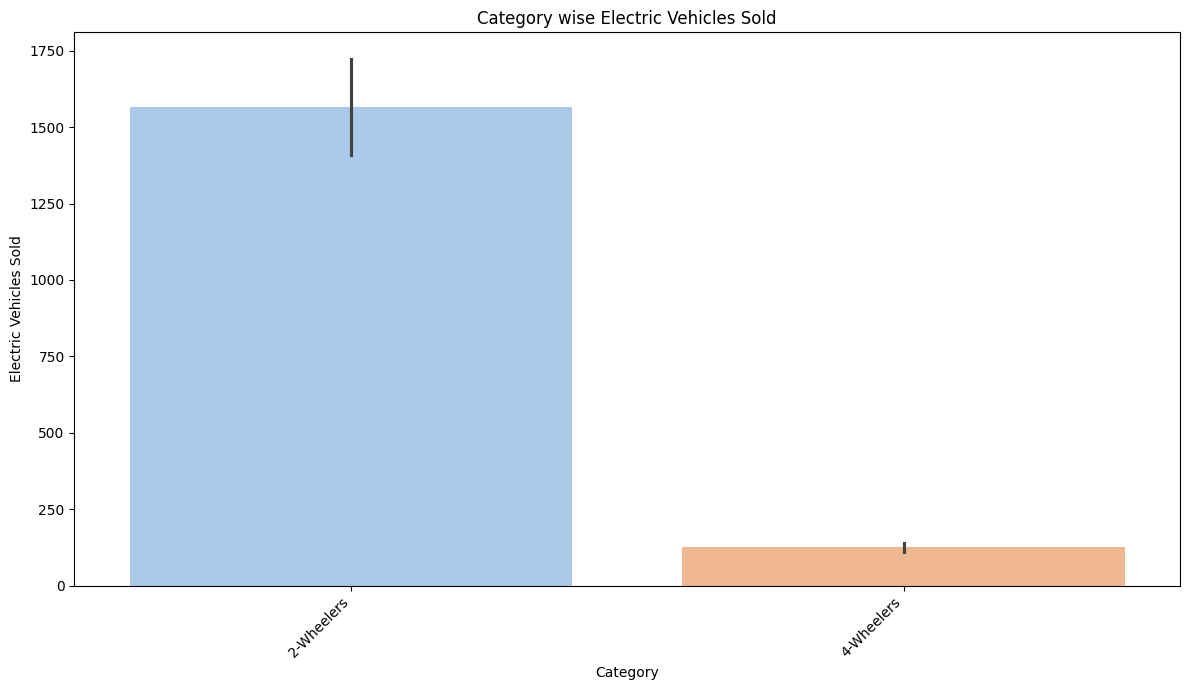

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=states_date_df, x='vehicle_category', y='electric_vehicles_sold', palette='pastel')
plt.title('Category wise Electric Vehicles Sold')
plt.xlabel('Category')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-49-1623199323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=states_date_df, x='vehicle_category', y='total_vehicles_sold', palette='pastel')


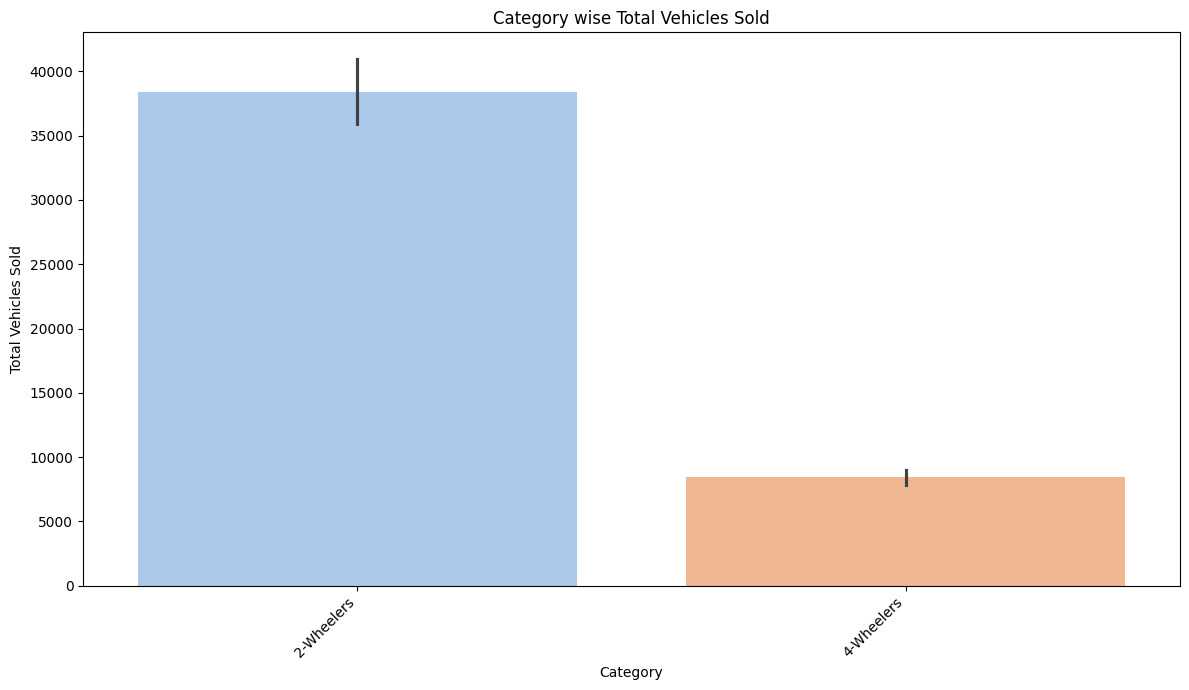

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=states_date_df, x='vehicle_category', y='total_vehicles_sold', palette='pastel')
plt.title('Category wise Total Vehicles Sold')
plt.xlabel('Category')
plt.ylabel('Total Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

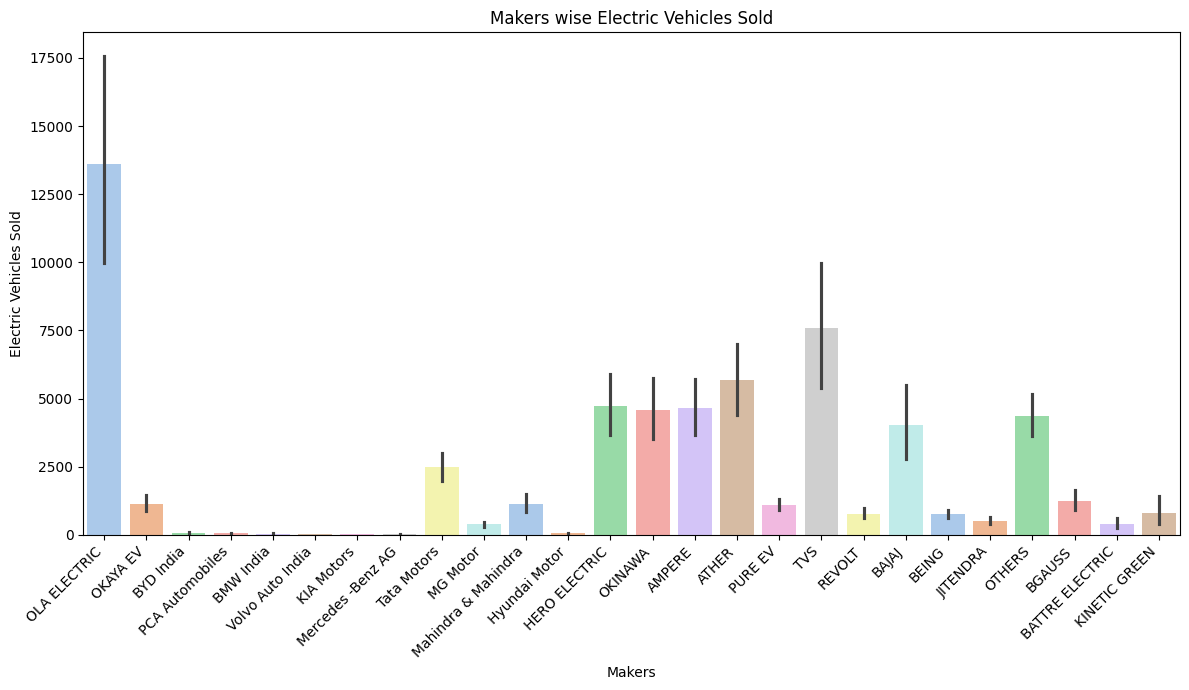

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=makers_date_df, x='maker', y='electric_vehicles_sold', palette='pastel')
plt.title('Makers wise Electric Vehicles Sold')
plt.xlabel('Makers')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-60-1690491747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=makers_date_df, x='quarter', y='electric_vehicles_sold', palette='pastel')


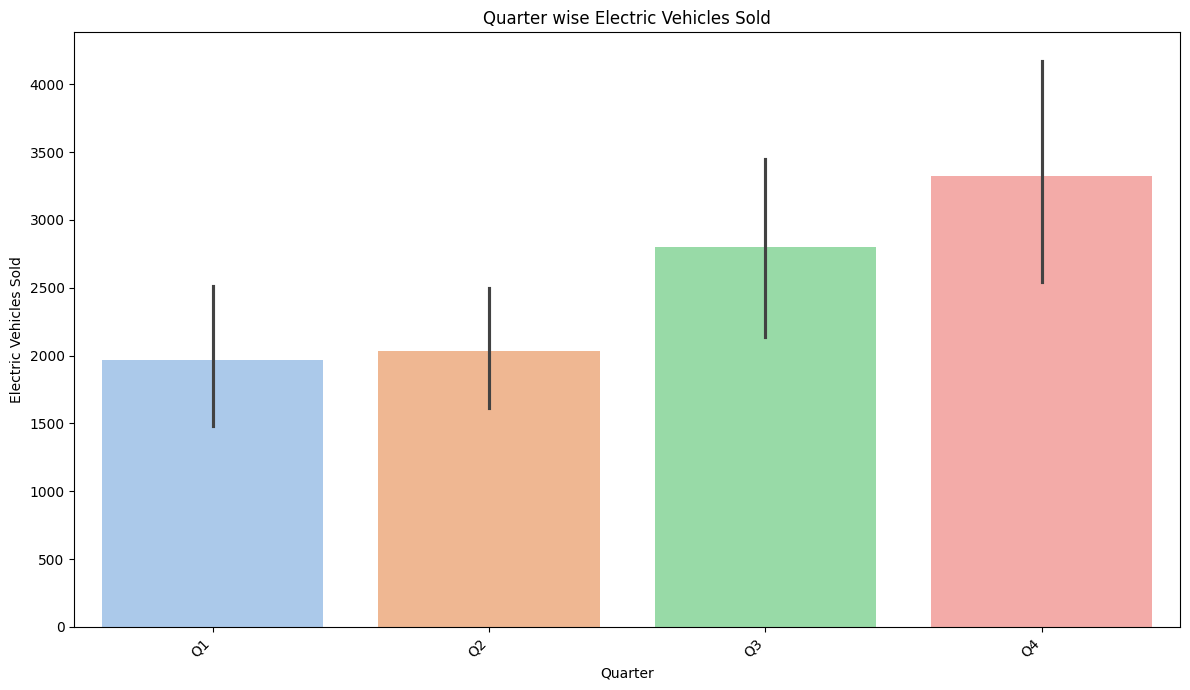

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=makers_date_df, x='quarter', y='electric_vehicles_sold', palette='pastel')
plt.title('Quarter wise Electric Vehicles Sold')
plt.xlabel('Quarter')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-61-784982627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=makers_date_df, x='fiscal_year', y='electric_vehicles_sold', palette='pastel')


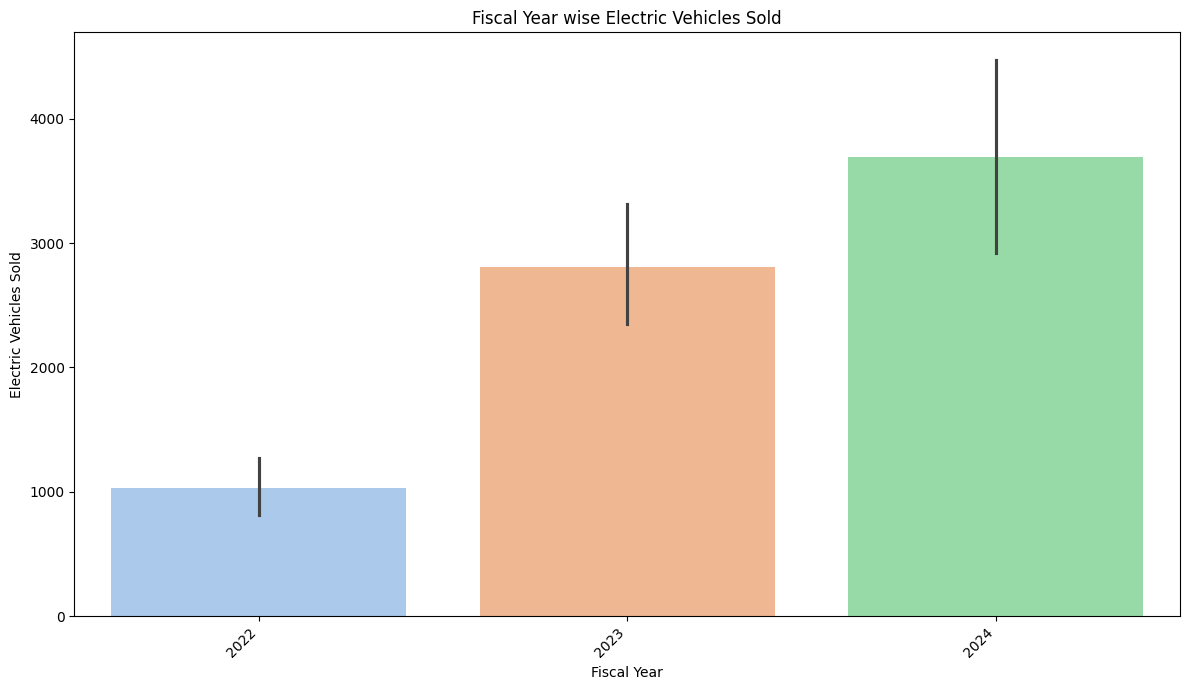

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=makers_date_df, x='fiscal_year', y='electric_vehicles_sold', palette='pastel')
plt.title('Fiscal Year wise Electric Vehicles Sold')
plt.xlabel('Fiscal Year')
plt.ylabel('Electric Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

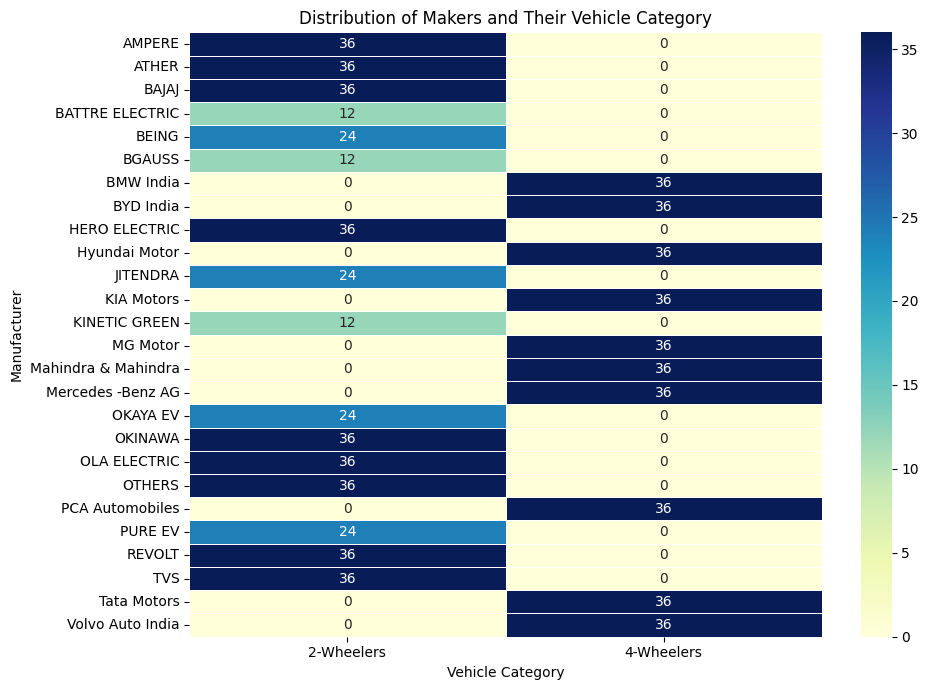


Chi-squared Test of Independence for Maker vs. Vehicle Category:
  Chi-squared statistic: 816.000
  P-value: 0.000
  Degrees of Freedom: 25
  (Statistically significant association between the two categorical variables)
Cramer's V for Maker vs. Vehicle Category: 1.000


In [ ]:
contingency_table = pd.crosstab(makers_date_df['maker'], makers_date_df['vehicle_category'])

plt.figure(figsize=(10, 7))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Distribution of Makers and Their Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()

# Perform Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared Test of Independence for {'Maker'} vs. {'Vehicle Category'}:")
print(f"  Chi-squared statistic: {chi2:.3f}")
print(f"  P-value: {p_value:.3f}")
print(f"  Degrees of Freedom: {dof}")
if p_value < 0.05:
    print("  (Statistically significant association between the two categorical variables)")
else:
    print("  (No statistically significant association)")

# Calculate Cramer's V
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1 # min(rows-1, cols-1)

# Handle potential division by zero if min_dim is 0 (e.g., if one category only has 1 value)
if min_dim == 0:
    cramers_v = np.nan # Or 0, depending on interpretation for degenerate cases
else:
    cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramer's V for {'Maker'} vs. {'Vehicle Category'}: {cramers_v:.3f}")
# Interpretation guidelines for Cramer's V (approximate):
# 0.00 - 0.10: Negligible association
# 0.10 - 0.20: Weak association
# 0.20 - 0.40: Moderate association
# 0.40 - 0.60: Strong association
# 0.60 - 1.00: Very strong association

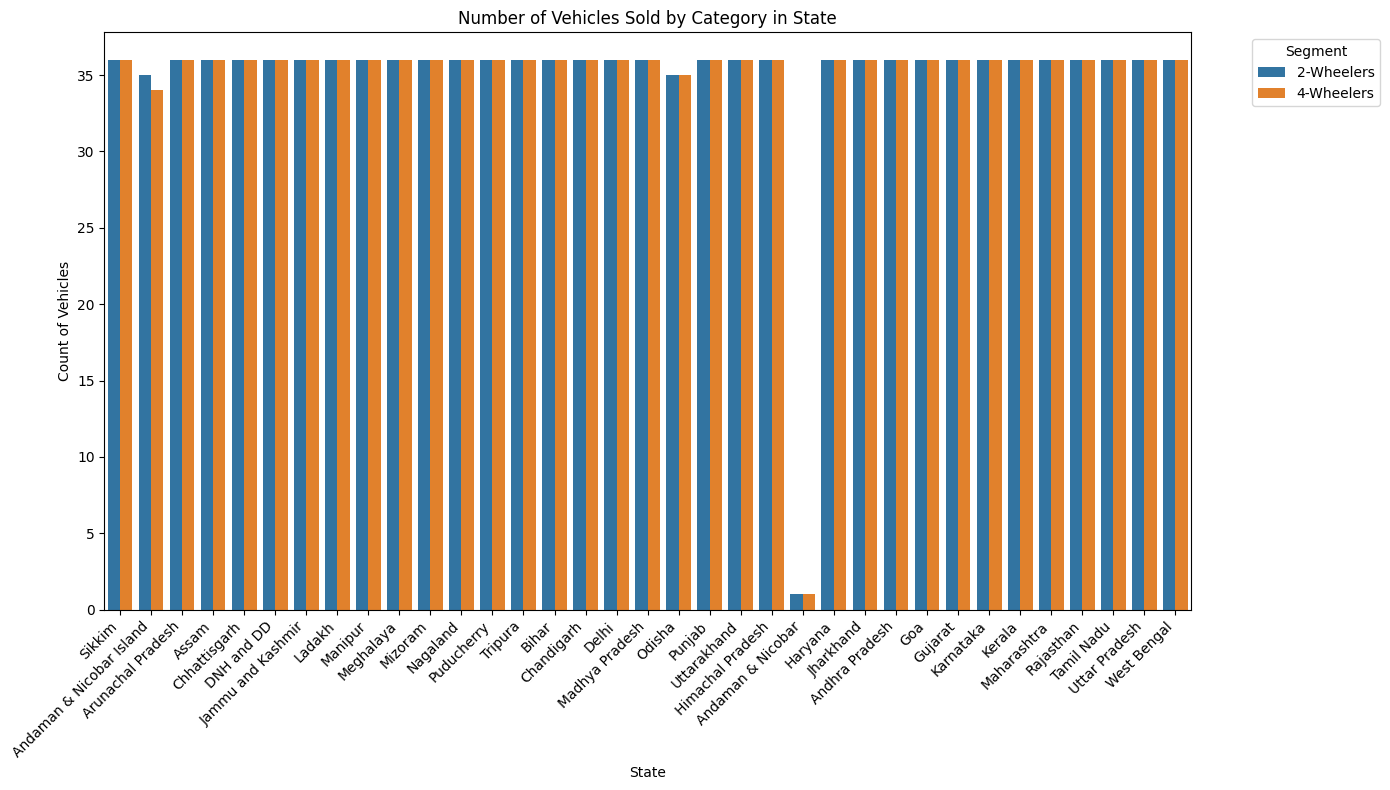

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=states_date_df, x='state', hue='vehicle_category', palette='tab10')
plt.title('Number of Vehicles Sold by Category in State')
plt.xlabel('State')
plt.ylabel('Count of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()